In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [414]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [415]:
from sklearn.linear_model import LogisticRegression

In [416]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [417]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [418]:
# remap Yes/No to 1/0 for rain_tomorrow column
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))

In [419]:
df.rain_tomorrow.value_counts()

0    2955
1     662
Name: rain_tomorrow, dtype: int64

In [420]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
resampler =  RandomOverSampler(sampling_strategy='minority', random_state=42)
filtered_df = df[['min_temp', 
                'max_temp', 
                'wind_speed3pm', 
                'humidity3pm', 
                'pressure3pm', 
                'temp3pm',
                'rainfall']]
filtered_df_resampled, df_rain_tomorrow_resampled = resampler.fit_resample(filtered_df, df[["rain_tomorrow"]])
df_rain_tomorrow_resampled.value_counts()

rain_tomorrow
0                2955
1                2955
dtype: int64

<AxesSubplot:title={'center':'Probability of rain tomorrow vs min temp'}, xlabel='min_temp', ylabel='rain_tomorrow'>

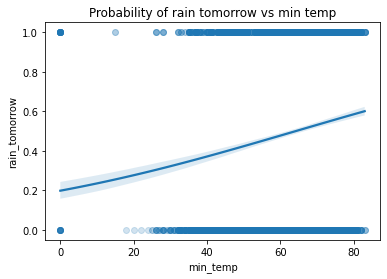

In [421]:
plt.title("Probability of rain tomorrow vs min temp")
sns.regplot(x=filtered_df_resampled.min_temp, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs max temp'}, xlabel='max_temp', ylabel='rain_tomorrow'>

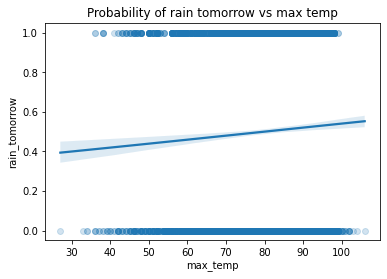

In [422]:
plt.title("Probability of rain tomorrow vs max temp")
sns.regplot(x=filtered_df_resampled.max_temp, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs wind speed at 3pm'}, xlabel='wind_speed3pm', ylabel='rain_tomorrow'>

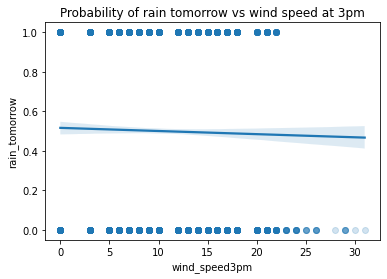

In [423]:
plt.title("Probability of rain tomorrow vs wind speed at 3pm")
sns.regplot(x=filtered_df_resampled.wind_speed3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs humidity at 3pm'}, xlabel='humidity3pm', ylabel='rain_tomorrow'>

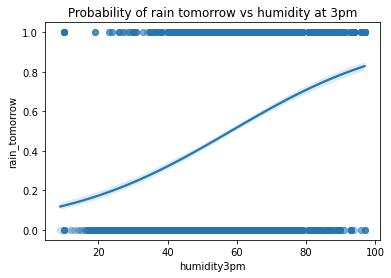

In [424]:
plt.title("Probability of rain tomorrow vs humidity at 3pm")
sns.regplot(x=filtered_df_resampled.humidity3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs pressure at 3pm'}, xlabel='pressure3pm', ylabel='rain_tomorrow'>

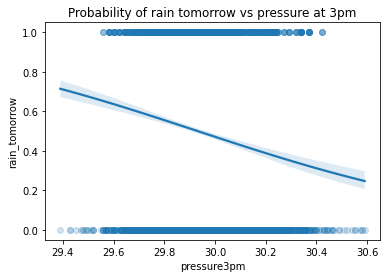

In [425]:
plt.title("Probability of rain tomorrow vs pressure at 3pm")
sns.regplot(x=filtered_df_resampled.pressure3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs temp at 3pm'}, xlabel='temp3pm', ylabel='rain_tomorrow'>

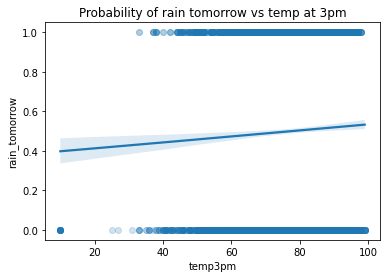

In [426]:
plt.title("Probability of rain tomorrow vs temp at 3pm")
sns.regplot(x=filtered_df_resampled.temp3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='rainfall', ylabel='rain_tomorrow'>

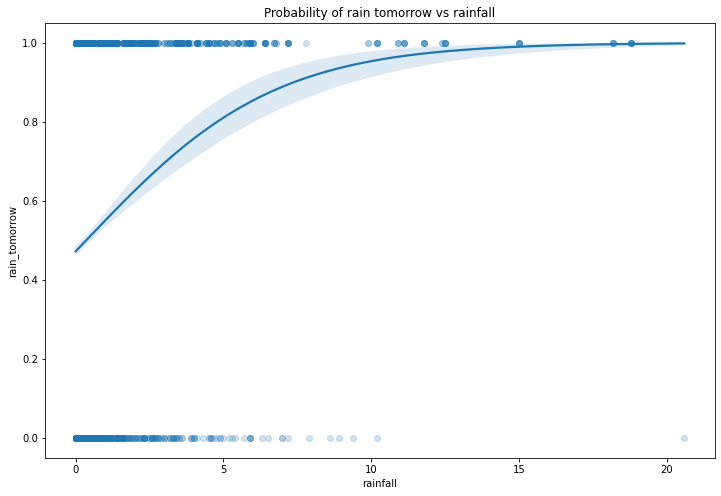

In [427]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=filtered_df_resampled.rainfall, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

In [428]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [471]:
input_cols = ['rainfall']

In [472]:
x_train = train[input_cols]

y_train = train[['rain_tomorrow']]

In [473]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = resampler.fit_resample(x_train, y_train)
y_train_resampled.value_counts()

rain_tomorrow
0                1768
1                1768
dtype: int64

In [474]:
x_test = test[input_cols]

y_test = test[['rain_tomorrow']]

In [475]:
model = LogisticRegression()  
model.fit(x_train_resampled, y_train_resampled)

/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [469]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [470]:
print('Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Score: 63.81


In [463]:
scaler = MinMaxScaler().fit(df[['rainfall', 'rain_tomorrow']])

In [436]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['rainfall', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(train_scaled[['rainfall', 'rain_tomorrow']])
validate_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(validate_scaled[['rainfall', 'rain_tomorrow']])
test_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(test_scaled[['rainfall', 'rain_tomorrow']])

In [437]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['rainfall', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['rainfall']] = scaler.fit_transform(train_scaled[['rainfall']])
validate_scaled[['rainfall']] = scaler.fit_transform(validate_scaled[['rainfall']])
test_scaled[['rainfall']] = scaler.fit_transform(test_scaled[['rainfall']])

In [438]:
x_train_scaled = train_scaled[['rainfall']]
y_train_scaled = train_scaled[['rain_tomorrow']]

In [439]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_scaled_resampled, y_train_scaled_resampled = resampler.fit_resample(x_train_scaled, y_train_scaled)

In [440]:
x_test_scaled = test_scaled[['rainfall']]

y_test_scaled = test_scaled[['rain_tomorrow']]

In [441]:
model_scaled = LogisticRegression()  
model_scaled.fit(x_train_scaled_resampled, y_train_scaled_resampled)
print('Score: {:.2f}'.format(model.score(x_test_scaled,y_test_scaled)*100))

/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- humidity3pm
- max_temp
- min_temp
- pressure3pm
- temp3pm
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but LogisticRegression is expecting 7 features as input.

<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='rainfall', ylabel='rain_tomorrow'>

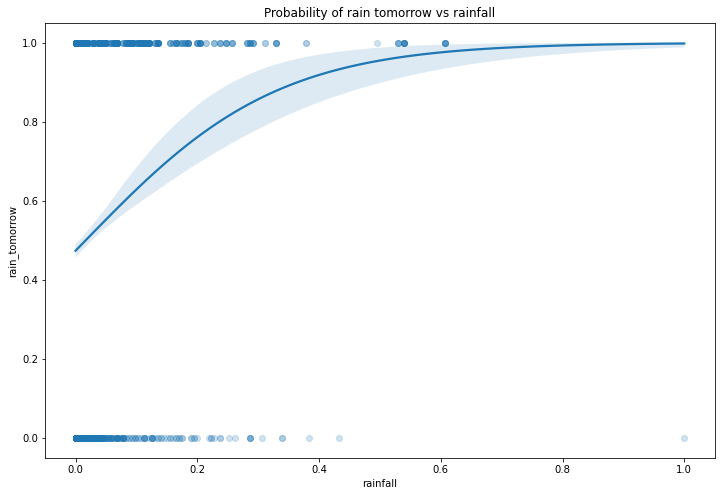

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_scaled_resampled.rainfall, y=y_train_scaled_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})